In [17]:
import matplotlib.pyplot as plt
import numpy as np
from tw_rouge import get_rouge
import json

In [29]:
with open('./output/valid_result.json') as f:
    data = json.load(f)

In [35]:
rouge1 = None
rouge2 = None
rougeL = None
ep = 1
for result in data:
    ret = get_rouge(preds=result['pred'],refs=result['ref'])
    rouge1_row = np.array([ep,ret['rouge-1']['r'],ret['rouge-1']['p'],ret['rouge-1']['f']])
    rouge2_row = np.array([ep,ret['rouge-2']['r'],ret['rouge-2']['p'],ret['rouge-2']['f']])
    rougeL_row = np.array([ep,ret['rouge-l']['r'],ret['rouge-l']['p'],ret['rouge-l']['f']])
    if rouge1 is None:
        rouge1 = rouge1_row
        rouge2 = rouge2_row
        rougeL = rougeL_row
    else:
        rouge1 = np.vstack((rouge1,rouge1_row))
        rouge2 = np.vstack((rouge2,rouge2_row))
        rougeL = np.vstack((rougeL,rougeL_row))
    ep += 1 

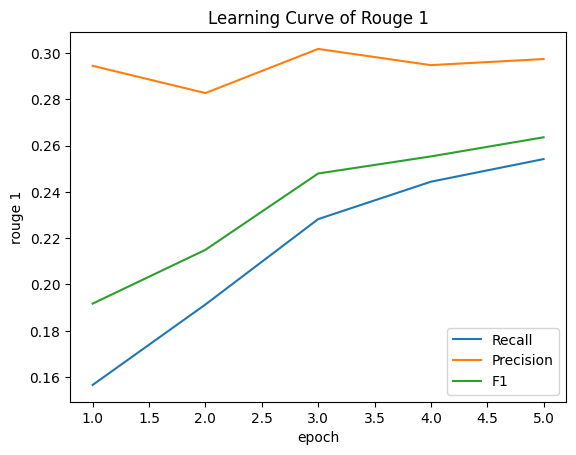

In [40]:
# Plotting the Graph
plt.plot(rouge1[:,0], rouge1[:,1], label = 'Recall')
plt.plot(rouge1[:,0], rouge1[:,2], label = 'Precision')
plt.plot(rouge1[:,0], rouge1[:,3], label = 'F1')
plt.title("Learning Curve of Rouge 1")
plt.xlabel("epoch")
plt.ylabel("rouge 1")
plt.legend()
plt.savefig("Rouge 1.png")
plt.show()

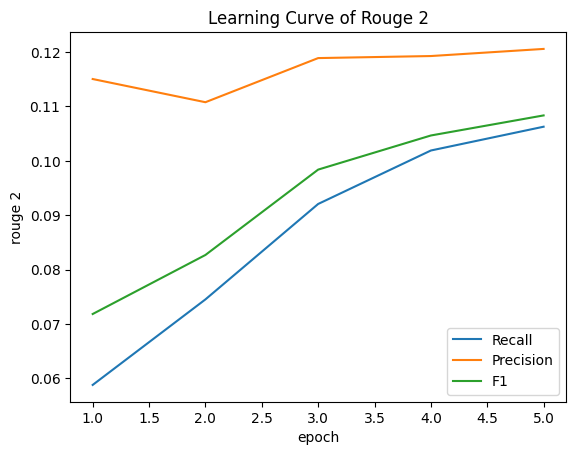

In [41]:
# Plotting the Graph
plt.plot(rouge2[:,0], rouge2[:,1], label = 'Recall')
plt.plot(rouge2[:,0], rouge2[:,2], label = 'Precision')
plt.plot(rouge2[:,0], rouge2[:,3], label = 'F1')
plt.title("Learning Curve of Rouge 2")
plt.xlabel("epoch")
plt.ylabel("rouge 2")
plt.legend()
plt.savefig("Rouge 2.png")
plt.show()

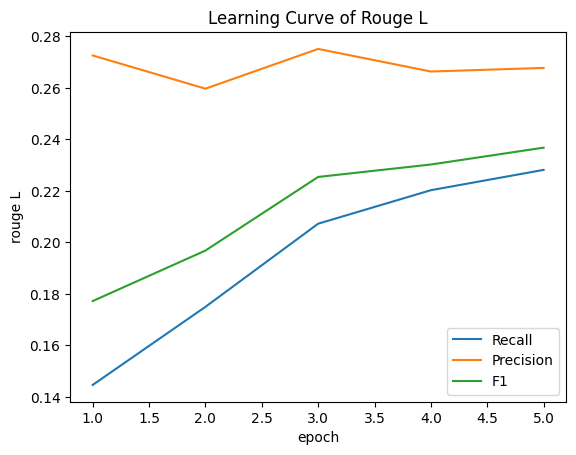

In [42]:
# Plotting the Graph
plt.plot(rouge2[:,0], rougeL[:,1], label = 'Recall')
plt.plot(rouge2[:,0], rougeL[:,2], label = 'Precision')
plt.plot(rouge2[:,0], rougeL[:,3], label = 'F1')
plt.title("Learning Curve of Rouge L")
plt.xlabel("epoch")
plt.ylabel("rouge L")
plt.legend()
plt.savefig("Rouge L.png")
plt.show()